In [1]:
import openeo
import xarray as xr
import matplotlib.pyplot as plt


In [ ]:



connection = openeo.connect(
    url="openeo.dataspace.copernicus.eu",
)
connection.authenticate_oidc()

spatial_extent = {"type":"Polygon","coordinates":[[[14.098274,40.941794],[14.098274,40.971144],[14.147026,40.971144],[14.147026,40.941794],[14.098274,40.941794]]]}
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent = spatial_extent  ,
    temporal_extent=["2025-04-28", "2025-05-01"],
    bands=["B04", "B08"],
)

# by Bands...
#red = s2cube.band("B04")
#nir = s2cube.band("B08")
#ndvi = (nir - red) / (nir + red)

# OR direct method...
ndvi= s2cube.ndvi()
ndvi.execute_batch("ndvi.nc",title="NDVI")

In [3]:

ds = xr.load_dataset("ndvi.nc")
ds

<xarray.Dataset> Size: 1MB
Dimensions:  (t: 2, x: 415, y: 331)
Coordinates:
  * t        (t) datetime64[ns] 16B 2025-04-28 2025-04-29
  * x        (x) float64 3kB 4.241e+05 4.241e+05 ... 4.282e+05 4.282e+05
  * y        (y) float64 3kB 4.536e+06 4.536e+06 ... 4.533e+06 4.533e+06
Data variables:
    crs      |S1 1B b''
    var      (t, y, x) float32 1MB 0.006042 -0.01707 -0.01162 ... 0.3996 0.3974
Attributes:
    Conventions:  CF-1.9
    institution:  Copernicus Data Space Ecosystem openEO API - 0.65.0a12.dev2...
    description:  
    title:

In [4]:
s2=ds.isel(t=1)

### Display NDVI

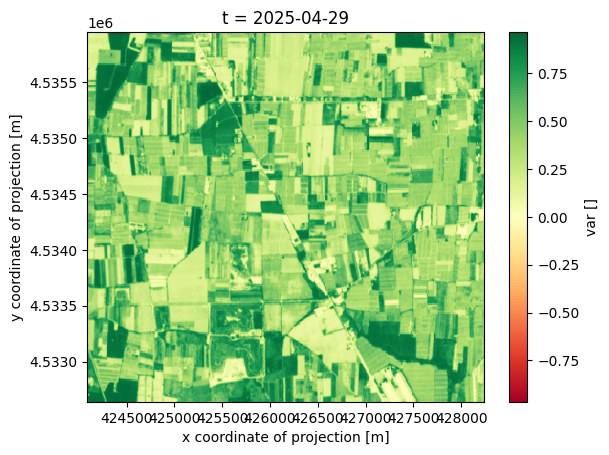

In [5]:
s2['var'].plot(cmap='RdYlGn')

### Using Matplotlib

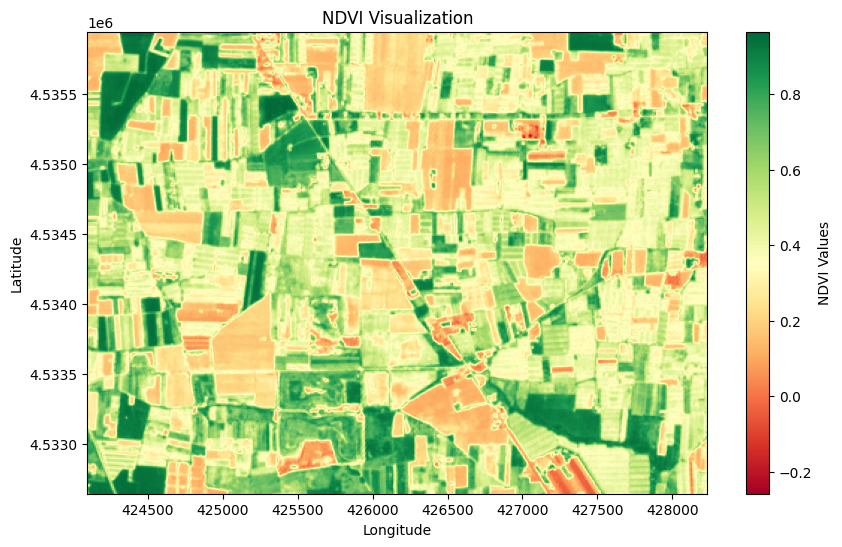

In [ ]:
import numpy as np

ndvi_array=s2.to_array()[1]
ndvi_data = ndvi_array.values.astype(np.float32)  # Assicurati che ndvi_data sia il tuo DataArray

# Crea la figura e l'asse
plt.figure(figsize=(10, 6))

# Visualizza l'array NDVI come immagine
plt.imshow(ndvi_data, cmap='RdYlGn', aspect='auto', extent=[ndvi_array.x.min(), ndvi_array.x.max(), ndvi_array.y.min(), ndvi_array.y.max()])
plt.colorbar(label='NDVI Values')
plt.title('NDVI Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostra il grafico
plt.show()